# K Nearest Neighbors with Cross Validation

You've been given a classified data set from a company! They've hidden the feature column names but have given you the data and the target classes. 

We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

## Import Libraries



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

## Get the Data

Set index_col=0 to use the first column as the index.

In [2]:
df = pd.read_csv("Classified Data", index_col = 0)
df.head() #index_col = 0

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [3]:
df.shape

(1000, 11)

## Train Test Split

In [4]:
x = df.drop('TARGET CLASS',axis=1).values 
y = df['TARGET CLASS'].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state = 5)

### Scaling

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

## Using KNN

Remember that we are trying to come up with a model to predict whether a dataset belongs to the TARGET CLASS or not. We'll start with k=3.

In [7]:
#instantiation with k = 3 , k is denoted as n_neighbors in code

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

## Evaluation

Let's evaluate our KNN model!

In [9]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.56      0.99      0.72       102
           1       0.95      0.19      0.32        98

    accuracy                           0.60       200
   macro avg       0.76      0.59      0.52       200
weighted avg       0.75      0.60      0.52       200



## Choosing a K Value

Text(0, 0.5, 'Accuracy Rate')

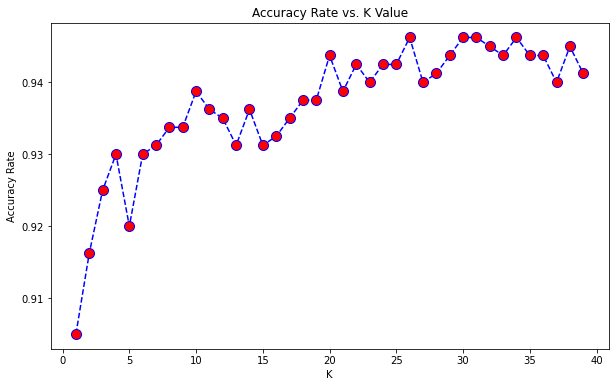

In [13]:
#Capturing Accuracy rate for different values of K from 1 to 40
accuracy_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_train,y_train,cv=10)
    accuracy_rate.append(score.mean())

    
#Plotting k on x axis and corresponding accuracy on y axis
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

# Look for the K value for which accuracy is consistently high

Text(0, 0.5, 'Error Rate')

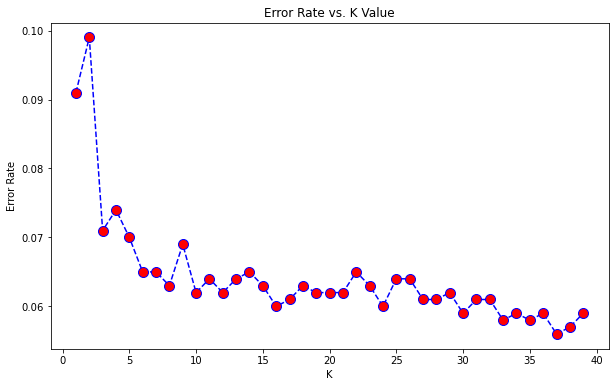

In [11]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x,y,cv=10)
    error_rate.append(1-score.mean())
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')  

Here we can see that that after around K > 20 the error rate just tends to hover around 0.06-0.05 Let's retrain the model with that and check the classification report!

Also, in case of Accuracy, after around K > 20, the accuracy is also almost contant.

In [12]:
# NOW WITH K=20 or 21 or 22 or 23. 
knn = KNeighborsClassifier(n_neighbors=20)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=20')
# print('\n')
# print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=20


              precision    recall  f1-score   support

           0       0.52      1.00      0.68       102
           1       1.00      0.04      0.08        98

    accuracy                           0.53       200
   macro avg       0.76      0.52      0.38       200
weighted avg       0.76      0.53      0.39       200



In [17]:
knn = KNeighborsClassifier(n_neighbors=27)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=28')
# print('\n')
# print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=28


              precision    recall  f1-score   support

           0       0.54      1.00      0.70       102
           1       1.00      0.11      0.20        98

    accuracy                           0.56       200
   macro avg       0.77      0.56      0.45       200
weighted avg       0.77      0.56      0.46       200



In [15]:
knn = KNeighborsClassifier(n_neighbors=32)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=32')
# print('\n')
# print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=32


              precision    recall  f1-score   support

           0       0.53      1.00      0.69       102
           1       1.00      0.07      0.13        98

    accuracy                           0.55       200
   macro avg       0.76      0.54      0.41       200
weighted avg       0.76      0.55      0.42       200



In [18]:
from sklearn.metrics import roc_curve, auc
pred_prob = knn.predict_proba(X_test)[::, 1]

fpr2, tpr2, _ = roc_curve(y_test,
                          pred_prob)

auc(fpr2,tpr2)

0.9666366546618648